<a href="https://colab.research.google.com/github/yangyang1598/Deeplearning/blob/main/10_Build_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 구현

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import layers, Model

## 1. VGG 16

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/10_vgg.png?raw=true)

In [ ]:
base_model=applications.vgg16.VGG16() #summary를 하기위해(VGG16만 쓰면 summary는 불가) vgg.VGG 형식으로 씀.
base_model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 128)       0   

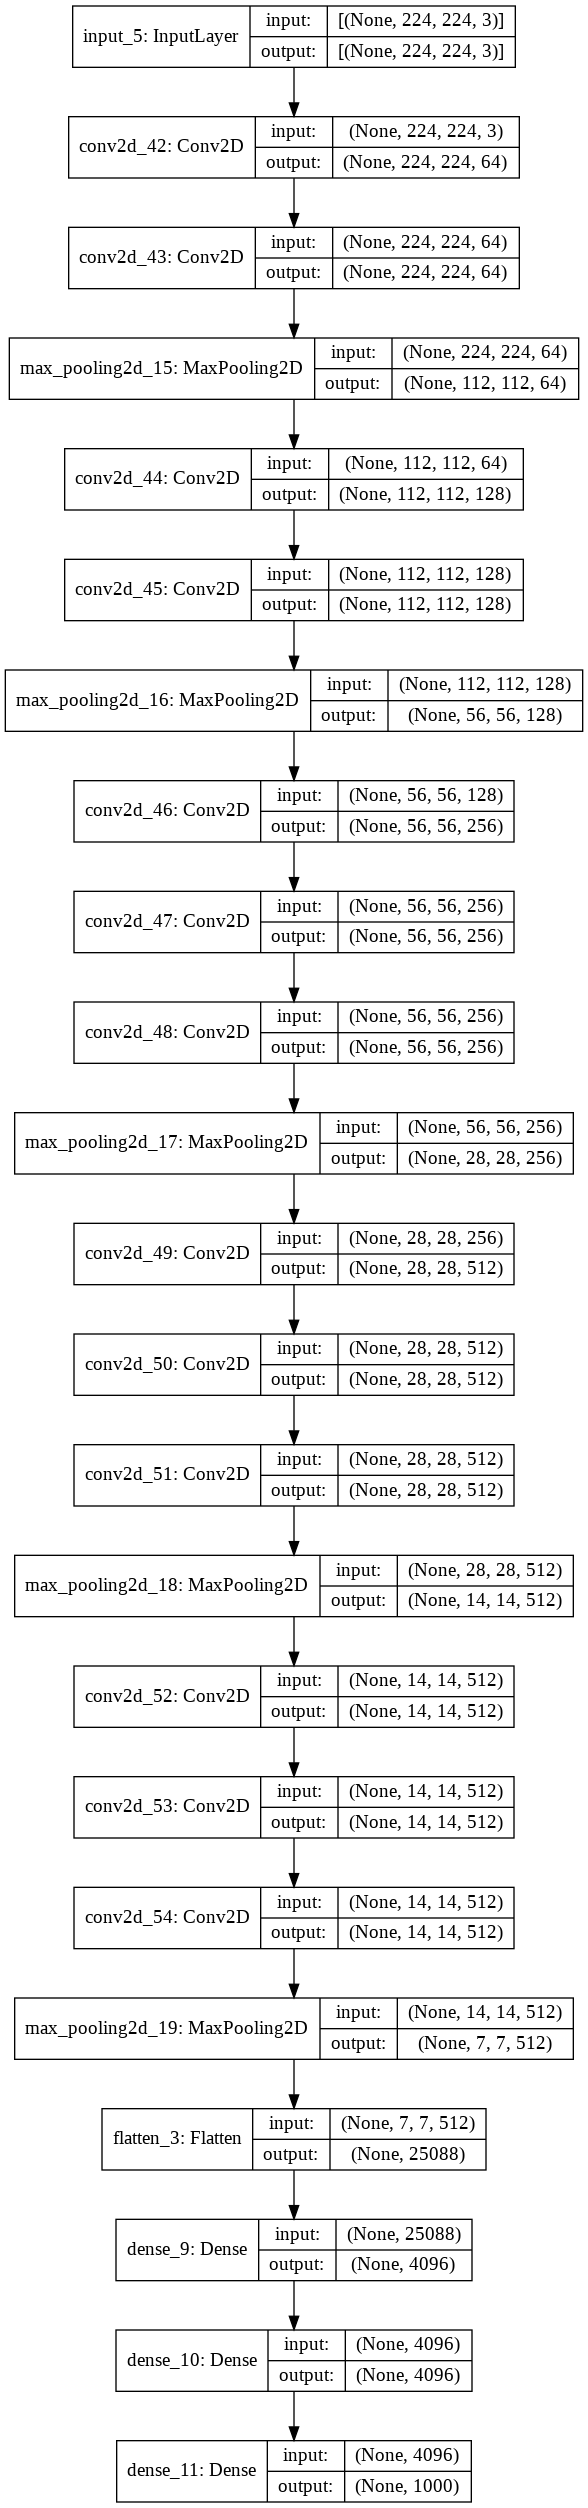

In [ ]:
from tensorflow.keras import layers, models,applications
from tensorflow.keras import  utils



def conv2d(x, d=64):
  y=layers.Conv2D(d, 3, padding="same", activation='relu')(x)
  return y

def maxpool(x, size=(1,1), stride=(2,2)):
  y=layers.MaxPooling2D(pool_size=size, strides=stride)(x)
  return y

def flatten(x,input=[7,7,512]):
  y=layers.Flatten(input_shape=input)(x)
  return y

def dense(x,input=4096,activation='softmax'):
  y=layers.Dense(input,activation=activation)(x)
  return y

x=layers.Input(shape=(224,224,3))

y=conv2d(x)
y=conv2d(y)
y=maxpool(y)

y=conv2d(y,d=128)
y=conv2d(y,d=128)
y=maxpool(y)


y=conv2d(y,d=256)
y=conv2d(y,d=256)
y=conv2d(y,d=256)
y=maxpool(y)


y=conv2d(y,d=512)
y=conv2d(y,d=512)
y=conv2d(y,d=512)
y=maxpool(y)


y=conv2d(y,d=512)
y=conv2d(y,d=512)
y=conv2d(y,d=512)
y=maxpool(y)

y=flatten(y)
y=dense(y)
y=dense(y)
y=dense(y,input=1000)


model = models.Model(x, y)

model.summary()
utils.plot_model(model,show_shapes=True)

## 2. MobileNET

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/10_dense.png?raw=true)

## 3. DenseNET